# 시계열 다루기

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기

(66281, 4)

In [64]:
act

,timestamp,X,Y,Z
0,2022-01-01 00:01:40.363,33,76,56
1,2022-01-01 00:01:42.961,34,87,56
2,2022-01-01 00:01:45.562,25,89,47
3,2022-01-01 00:01:48.163,11,70,50
4,2022-01-01 00:02:08.864,33,72,58
...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136
66277,2022-01-31 23:28:41.683,-89,145,138
66278,2022-01-31 23:28:49.383,-93,138,137
66279,2022-01-31 23:32:36.426,-93,131,137


In [96]:
#거리 및 속도 산출을 위해, 직전에 감지된(t-1) 좌표값열을 추가함
# shift(1)로 timestamp열값이 하나씩 아래로 이동된다.
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [97]:
# NaN 값이 있는 행을 삭제하자. NaN가 있으면 거리 및 속도 계산할 수 없다.
cleaned = act.dropna()
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [98]:
# 직전 좌표값으로 두 지점간의 거리를 산출한 값을 dist 열에 추가한다.

# 두 좌표값으로 거리를 계산하는 파이썬 함수
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)

cleaned.loc[:,'dist'] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\1795393730.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:,'dist'] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111


In [68]:
# # 직전 좌표값으로 두 지점간의 거리를 산출한 다음, 산출된 값을 dist 열에 추가한다.
# def calc_dist(df):
#     x_d = df['X'] - df['p_x']
#     y_d = df['Y'] - df['p_y']
#     z_d = df['Z'] - df['p_z']
#     return np.sqrt(x_d**2 + y_d**2 + z_d**2)

# # cleaned = act2.copy()
# cleaned.loc[:,['dist']] = cleaned.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)
# cleaned.head(5)


In [99]:
cleaned

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111
...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000


In [100]:
#시간 차분을 구한 다음, d_time 열에 저장한다.
from datetime import datetime

def calc_timediff(df):
    d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()

cleaned['d_time'] = cleaned[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\3710312987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['d_time'] = cleaned[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [71]:
# #시간 차분을 구한 다음, d_time 열에 저장한다.

# from datetime import datetime

# def calc_timediff(df):
#     d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
#     d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
#     return (d1 - d2).total_seconds()

# cleaned.loc[:, 'd_time'] = cleaned.loc[:, ["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
# cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\3114087386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:, 'd_time'] = cleaned.loc[:, ["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [101]:
"""
cleaned[["timestamp", "p_timestamp"]]는 cleaned.loc[:, ["timestamp", "p_timestamp"]]와 동일한 의미이다.
cleaned.loc[:, ["timestamp", "p_timestamp"]]는 cleaned DataFrame에서 timestamp열과 p_timestamp열의 모든 행을 뜻한다.
출력해 보자.
"""
cleaned.loc[:, ["timestamp", "p_timestamp"]]

# 데이터가 제대로 조작되고 있는지 이렇게 출력해 나가면 코드를 다루면 된다.

,timestamp,p_timestamp
1,2022-01-01 00:01:42.961,2022-01-01 00:01:40.363
2,2022-01-01 00:01:45.562,2022-01-01 00:01:42.961
3,2022-01-01 00:01:48.163,2022-01-01 00:01:45.562
4,2022-01-01 00:02:08.864,2022-01-01 00:01:48.163
5,2022-01-01 00:02:21.765,2022-01-01 00:02:08.864
...,...,...
66276,2022-01-31 23:28:00.481,2022-01-31 23:27:55.381
66277,2022-01-31 23:28:41.683,2022-01-31 23:28:00.481
66278,2022-01-31 23:28:49.383,2022-01-31 23:28:41.683
66279,2022-01-31 23:32:36.426,2022-01-31 23:28:49.383


In [102]:
"""
속도를 구한 다음, activity 열에 저장한다.
"""

# 거리/시간차분으로 속도를 구하는 파이썬 함수
def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        # 정상적인 수가 아님.
        return 0

cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(calc_act, axis=1)
cleaned.head(5)

C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\1423552076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['calc_act'] = cleaned[["dist", "d_time"]].apply(calc_act, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475


<AxesSubplot: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

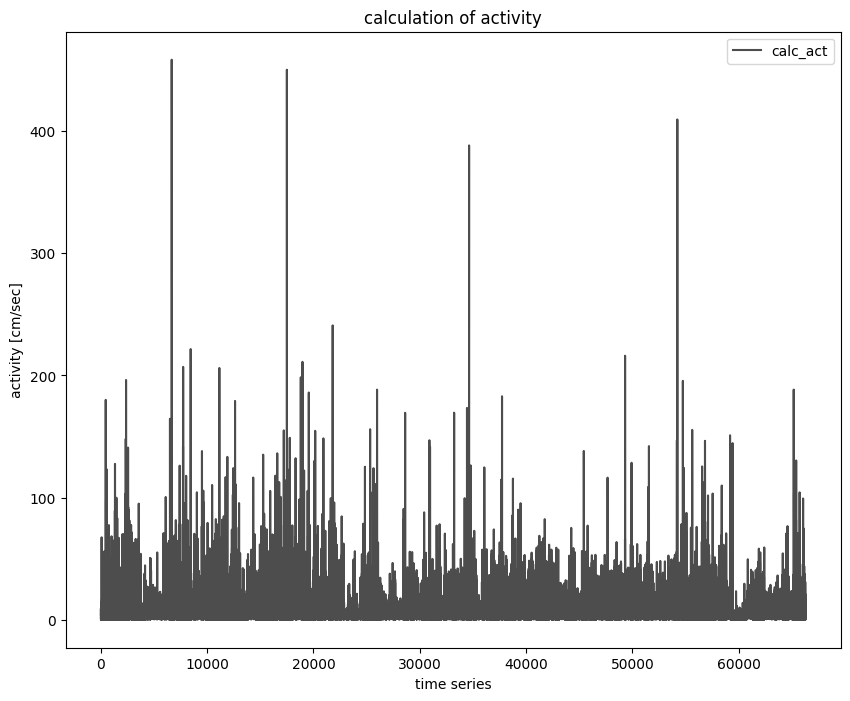

In [103]:
# 그래프 사이즈 설정, (가로, 세로 길이)
plt.rcParams['figure.figsize'] = [10, 8]

cleaned.plot(y="calc_act", color="0.3", title="calculation of activity", ylabel="activity [cm/sec]", xlabel="time series")

In [189]:
# 전체에서 움직임이 30[cm/sec] 이하의 비율을 구해보자
len(cleaned[cleaned['calc_act'] < 50.0])/len(cleaned)

0.9916113458056729

## 데이터를 10분 간격으로 그룹핑하기

In [186]:
cleaned.dtypes

timestamp       object
X                int64
Y                int64
Z                int64
p_timestamp     object
p_x            float64
p_y            float64
p_z            float64
dist           float64
d_time         float64
calc_act       float64
dtype: object

In [149]:
cleaned

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475
...,...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100,3.167744
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202,0.084076
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700,1.055070
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043,0.030831


In [150]:
cleaned.resample('10min')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [177]:
# 먼저 cleaned 데이터프레임을 복사하고,
cleaned2 = cleaned.copy()
# 필요한 열만 추출하고,
cleaned2 = cleaned2[['timestamp', 'calc_act']]
# timestamp를 datetime 데이터타입으로 변경
cleaned2['timestamp'] = cleaned2['timestamp'].astype('datetime64[ns]')
cleaned2

,timestamp,calc_act
1,2022-01-01 00:01:42.961,4.251486
2,2022-01-01 00:01:45.562,4.953517
3,2022-01-01 00:01:48.163,9.146772
4,2022-01-01 00:02:08.864,1.134954
5,2022-01-01 00:02:21.765,0.980475
...,...,...
66276,2022-01-31 23:28:00.481,3.167744
66277,2022-01-31 23:28:41.683,0.084076
66278,2022-01-31 23:28:49.383,1.055070
66279,2022-01-31 23:32:36.426,0.030831


In [178]:
cleaned2.dtypes

timestamp    datetime64[ns]
calc_act            float64
dtype: object

In [180]:
cleaned2 = cleaned2.set_index('timestamp')

In [187]:
cleaned2.dtypes

calc_act    float64
dtype: object

In [181]:
cleaned2

,calc_act
timestamp,
2022-01-01 00:01:42.961,4.251486
2022-01-01 00:01:45.562,4.953517
2022-01-01 00:01:48.163,9.146772
2022-01-01 00:02:08.864,1.134954
2022-01-01 00:02:21.765,0.980475
...,...
2022-01-31 23:28:00.481,3.167744
2022-01-31 23:28:41.683,0.084076
2022-01-31 23:28:49.383,1.055070


In [182]:
cleaned2.dtypes

calc_act    float64
dtype: object

In [191]:
tenmin = cleaned2.resample('10min')
result = tenmin['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
timestamp,,,
2022-01-01 00:00:00,2.359774,0.205775,9.146772
2022-01-01 00:10:00,3.804910,0.011198,12.985407
2022-01-01 00:20:00,1.204413,0.176624,3.200697
2022-01-01 00:30:00,0.065608,0.065608,0.065608
2022-01-01 00:40:00,NaN,NaN,NaN
...,...,...,...
2022-01-31 22:50:00,5.271830,0.174116,16.061886
2022-01-31 23:00:00,NaN,NaN,NaN
2022-01-31 23:10:00,11.671627,0.090195,31.025631


<AxesSubplot: title={'center': 'resample by 10-minute'}, xlabel='timestamp', ylabel='Average activity [cm/sec]'>

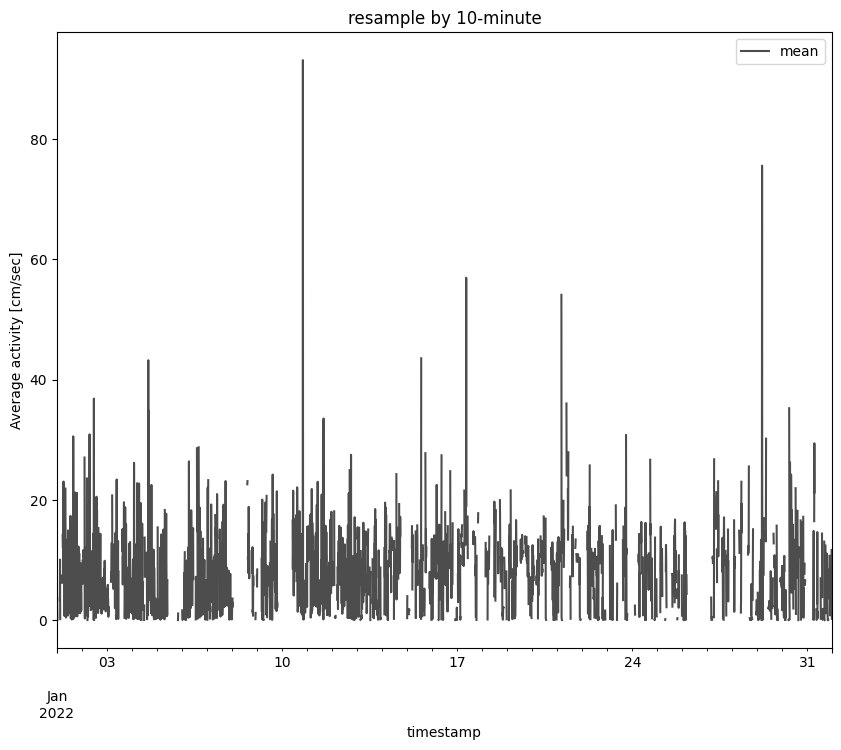

In [192]:
result.plot(y="mean", color="0.3", title="resample by 10-minute", ylabel="Average activity [cm/sec]", xlabel="timestamp")

## 데이터를 1시간 단위로 그룹핑하기

In [194]:
oneHour = cleaned2.resample('1H')
result = oneHour['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
timestamp,,,
2022-01-01 00:00:00,3.025915,0.011198,14.338601
2022-01-01 01:00:00,3.948859,0.013024,7.813303
2022-01-01 02:00:00,1.965045,0.006504,9.646105
2022-01-01 03:00:00,9.173303,0.065512,67.447458
2022-01-01 04:00:00,6.503876,0.000000,28.781980
...,...,...,...
2022-01-31 19:00:00,3.453507,0.014785,39.131190
2022-01-31 20:00:00,0.052261,0.005667,0.112500
2022-01-31 21:00:00,8.707639,0.076334,43.773557


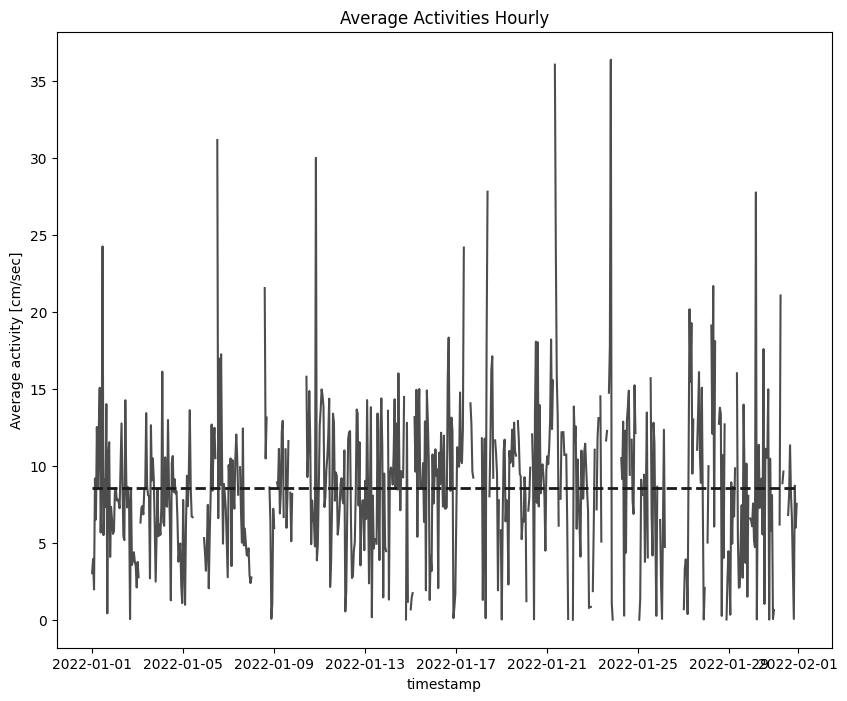

In [209]:
plt.plot( result['mean'], color='0.3')

# 속도(활동) 평균선
plt.hlines(result['mean'].mean(),  min(result.index), max(result.index),  color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Hourly")
plt.xlabel("timestamp")
plt.ylabel("Average activity [cm/sec]")

plt.show()

## 데이터를 1일 단위로 그룹핑하기

In [210]:
oneDay = cleaned2.resample('D')
result = oneDay['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
timestamp,,,
2022-01-01,8.801942,0.000000,180.000000
2022-01-02,6.869050,0.000000,196.279481
2022-01-03,7.388244,0.000000,458.448986
2022-01-04,8.304327,0.000000,221.561886
2022-01-05,7.711977,0.005796,110.315326
2022-01-06,10.305163,0.000000,206.091424
2022-01-07,6.816522,0.000000,179.109595
2022-01-08,9.871009,0.000000,116.407418
2022-01-09,8.701704,0.000000,135.110723


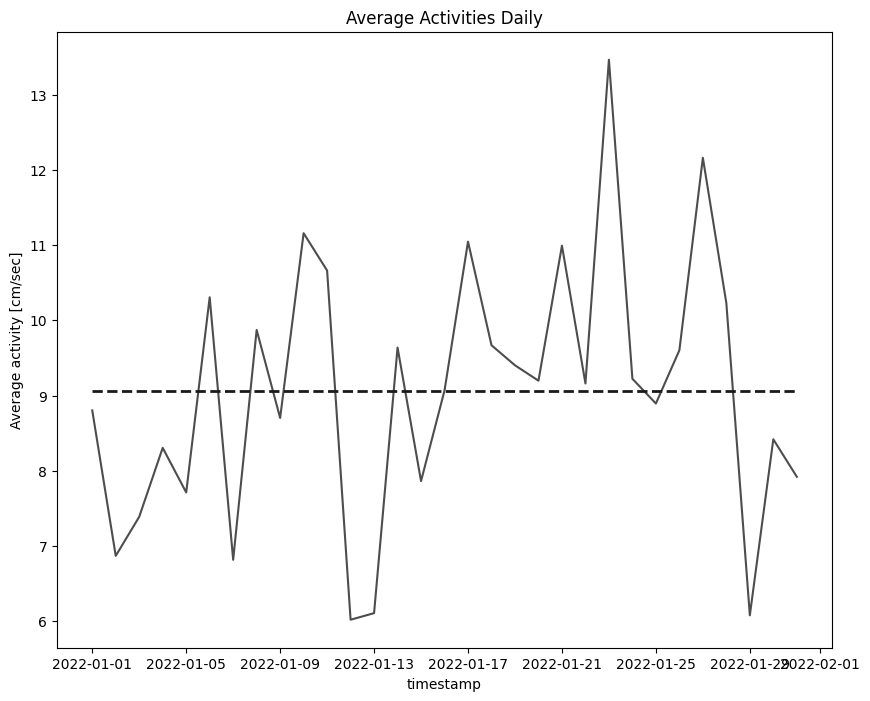

In [211]:
plt.plot( result['mean'], color='0.3')

# 속도(활동) 평균선
plt.hlines(result['mean'].mean(),  min(result.index), max(result.index),  color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("timestamp")
plt.ylabel("Average activity [cm/sec]")

plt.show()

In [86]:
# 좀 알아보기 어렵다.
# 그렇다면, 10분 간격으로 활동지수를 산출해 보자.

# https://www.unixtimestamp.com/ 에서 unix time이 맞는지 확인 가능

# unix time의 단위는 초이다. 10분 간격으로 하려면 unix time를 600초 나눈 몫을 각 열에 추가한다.
# 600초로 나눈 몫 값이 같은, 행들의 평균과 최소, 최대값을 구해보자.

from datetime import datetime
import time

# 시간정보 문자열을 정수 자료형 unix time으로 변환후, 10분단위로 절삭하는 함수
def make_unixtime(ts):
    print(ts)
    temp = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)

cleaned['utime'] = cleaned['timestamp'].apply(make_unixtime)
cleaned.head(5)


2022-01-01 00:01:42.961
2022-01-01 00:01:45.562
2022-01-01 00:01:48.163
2022-01-01 00:02:08.864
2022-01-01 00:02:21.765
2022-01-01 00:02:32.092
2022-01-01 00:02:37.297
2022-01-01 00:03:10.795
2022-01-01 00:03:31.301
2022-01-01 00:03:41.495
2022-01-01 00:03:43.995
2022-01-01 00:04:30.098
2022-01-01 00:04:45.699
2022-01-01 00:04:56.099
2022-01-01 00:05:01.305
2022-01-01 00:05:14.100
2022-01-01 00:05:32.202
2022-01-01 00:06:13.502
2022-01-01 00:06:16.104
2022-01-01 00:06:34.105
2022-01-01 00:13:23.327
2022-01-01 00:15:29.232
2022-01-01 00:19:15.346
2022-01-01 00:19:17.948
2022-01-01 00:19:20.545
2022-01-01 00:19:23.146
2022-01-01 00:19:54.052
2022-01-01 00:19:56.651
2022-01-01 00:19:59.250
2022-01-01 00:20:22.451
2022-01-01 00:20:30.109
2022-01-01 00:20:40.348
2022-01-01 00:24:16.461
2022-01-01 00:24:52.362
2022-01-01 00:39:28.609
2022-01-01 00:53:52.456
2022-01-01 00:56:53.163
2022-01-01 00:56:55.763
2022-01-01 00:56:58.264
2022-01-01 00:57:00.864
2022-01-01 00:57:03.464
2022-01-01 01:17

C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\3744079828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['utime'] = cleaned['timestamp'].apply(make_unixtime)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,dt,utime
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,2022-01-01 00:01:42.961,2734938
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,2022-01-01 00:01:45.562,2734938
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,2022-01-01 00:01:48.163,2734938
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,2022-01-01 00:02:08.864,2734938
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,2022-01-01 00:02:21.765,2734938


In [87]:
# 좀 알아보기 어렵다.
# 그렇다면, 10분 간격으로 활동지수를 산출해 보자.

# https://www.unixtimestamp.com/ 에서 unix time이 맞는지 확인 가능

# unix time의 단위는 초이다. 10분 간격으로 하려면 unix time를 600초 나눈 몫을 각 열에 추가한다.
# 600초로 나눈 몫 값이 같은, 행들의 평균과 최소, 최대값을 구해보자.

from datetime import datetime
import time

# 시간정보 문자열을 정수 자료형 unix time으로 변환후, 10분단위로 절삭하는 함수
def make_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)
   
cleaned['utime2'] = cleaned[['timestamp']].apply(make_unixtime, axis=1)
cleaned.head(5)


C:\Users\sunin\AppData\Local\Temp\ipykernel_11600\3728856386.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['utime2'] = cleaned[['timestamp']].apply(make_unixtime, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,dt,utime,utime2
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,2022-01-01 00:01:42.961,2734938,2734938
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,2022-01-01 00:01:45.562,2734938,2734938
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,2022-01-01 00:01:48.163,2734938,2734938
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,2022-01-01 00:02:08.864,2734938,2734938
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,2022-01-01 00:02:21.765,2734938,2734938


In [88]:
print(type('2022-01-01 00:01:42.961	'))

<class 'str'>


In [89]:
print(len('2022-01-01 00:01:42.961'))

23


In [90]:
import sys

#파이썬에서는 자료형에 맞는 클래스를 부여하는 방식으로 자료형 변수를 가진다.

print(sys.getsizeof('2022-01-01 00:01:42.961'))
print(sys.getsizeof(datetime.strptime('2022-01-01 00:01:42.961', "%Y-%m-%d %H:%M:%S.%f")))
print(sys.getsizeof(2734938))
print(sys.getsizeof(2734938.1))
print(sys.getsizeof(12))

print(type('2022-01-01 00:01:42.961'))
print(type(datetime.strptime('2022-01-01 00:01:42.961', "%Y-%m-%d %H:%M:%S.%f")))
print(type(2734938))
print(type(2734938.1))
print(type(12))


72
48
28
24
28
<class 'str'>
<class 'datetime.datetime'>
<class 'int'>
<class 'float'>
<class 'int'>


In [91]:
cleaned.groupby('utime')['calc_act'].mean().head(100)
### dont

utime
2734938    2.359774
2734939    3.804910
2734940    1.204413
2734941    0.065608
2734943    6.089196
             ...   
2735073    5.549867
2735074    5.418698
2735075    9.435269
2735076    4.334201
2735077    4.610322
Name: calc_act, Length: 100, dtype: float64

In [92]:
s_grouped = cleaned3.groupby('utime')['calc_act']
s_grouped.max()
#dont


NameError: name 'cleaned3' is not defined

In [ ]:
cleaned4 = cleaned.loc[:, ['utime', 'calc_act']]
cleaned4
#dont

KeyError: "['calc_act'] not in index"

In [ ]:
grouped = cleaned.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
grouped_calc_act.agg('mean')
#dont

KeyError: 'Column not found: calc_act'

In [ ]:
gp = cleaned['calc_act'].groupby(cleaned['utime'])

result = pd.DataFrame()
result['mean'] = gp.mean()
result['min'] = gp.min()
result['max'] = gp.max()

result

# grouped = cleaned.groupby(['utime'])
# grouped.head(10)

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [ ]:
result.describe()

,mean,min,max
count,2363.000000,2363.000000,2363.000000
mean,7.706165,0.265219,31.111548
std,6.838683,0.685761,34.790031
min,0.001043,0.000000,0.001043
25%,2.188362,0.043078,7.275794
50%,7.058560,0.127554,26.054676
75%,11.246453,0.299810,42.241444
max,93.167257,13.350381,458.448986


In [ ]:
grouped = cleaned.groupby(['utime'])
result = grouped['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [ ]:
grouped = cleaned.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601
...,...,...,...
2739394,6.668550,0.000000,20.857873
2739395,5.271830,0.174116,16.061886
2739397,11.671627,0.090195,31.025631


In [ ]:
#result.drop(['utime'], axis=1)
#result['utime'] = result['utime'].apply(np.init64)
#result['utime']



<AxesSubplot: xlabel='utime'>

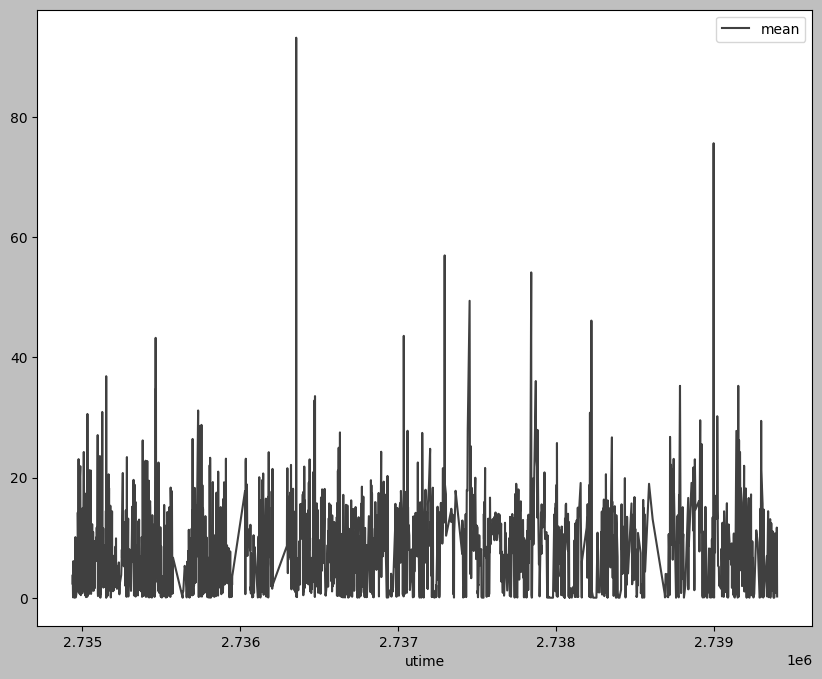

In [ ]:
#x_ticks = list(grouped.groups.keys())
#result.plot(xticks=x_ticks, y="mean")

# 각 utime에 평균치를 그래프로 그려보자
result.plot(y="mean", c="0.25")

In [ ]:
#do not
cleaned4 = cleaned3['utime', 'calc_act']
cleaned4['act_mean'] = cleaned3.groupby('utime')['calc_act'].mean()
cleaned4['act_max'] = cleaned3.groupby('utime')['calc_act'].max()
cleaned4['act_min'] = cleaned3.groupby('utime')['calc_act'].min()
cleaned4.head(100)

,timestamp,X,Y,Z,p_x,p_timestamp,p_y,p_z,dist,d_time,calc_act,utime,act_mean,act_max,act_min
1,2022-01-01 00:01:42.961,34,87,56,33.0,2022-01-01 00:01:40.363,76.0,56.0,11.045361,2.598,4.251486,2734938.0,NaN,NaN,NaN
2,2022-01-01 00:01:45.562,25,89,47,34.0,2022-01-01 00:01:42.961,87.0,56.0,12.884099,2.601,4.953517,2734938.0,NaN,NaN,NaN
3,2022-01-01 00:01:48.163,11,70,50,25.0,2022-01-01 00:01:45.562,89.0,47.0,23.790755,2.601,9.146772,2734938.0,NaN,NaN,NaN
4,2022-01-01 00:02:08.864,33,72,58,11.0,2022-01-01 00:01:48.163,70.0,50.0,23.494680,20.701,1.134954,2734938.0,NaN,NaN,NaN
5,2022-01-01 00:02:21.765,21,68,58,33.0,2022-01-01 00:02:08.864,72.0,58.0,12.649111,12.901,0.980475,2734938.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2022-01-01 04:36:09.554,-35,443,37,-48.0,2022-01-01 04:36:06.954,443.0,40.0,13.341664,2.600,5.131409,2734965.0,NaN,NaN,NaN
97,2022-01-01 04:36:12.155,-38,440,53,-35.0,2022-01-01 04:36:09.554,443.0,37.0,16.552945,2.601,6.364070,2734965.0,NaN,NaN,NaN
98,2022-01-01 04:36:14.755,-25,450,42,-38.0,2022-01-01 04:36:12.155,440.0,53.0,19.748418,2.600,7.595545,2734965.0,NaN,NaN,NaN
99,2022-01-01 04:36:17.353,-49,456,26,-25.0,2022-01-01 04:36:14.755,450.0,42.0,29.461840,2.598,11.340200,2734965.0,NaN,NaN,NaN


In [ ]:
cleaned

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,utime
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,2734938
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,2734938
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,2734938
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,2734938
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,2734938
...,...,...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100,3.167744,2739398
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202,0.084076,2739398
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700,1.055070,2739398
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043,0.030831,2739399


In [ ]:
# 일별 활동지수
# 86400 = 60 sec x 60 min x 24 hour
def make_day_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 86400)
    
day = cleaned.copy()
day['utime'] =cleaned[["timestamp"]].apply(make_day_unixtime, axis=1)
day.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act,utime
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486,18992
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517,18992
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772,18992
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954,18992
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475,18992


In [ ]:
# unxtime으로 그룹핑하기
grouped = day.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)

,mean,min,max
utime,,,
18992,9.598048,0.0,180.000000
18993,8.604871,0.0,196.279481
18994,6.518747,0.0,458.448986
18995,8.260939,0.0,206.975693
18996,8.240758,0.0,221.561886


In [ ]:
#인덱스 utime을 열로 변환
result = result.reset_index()
result.head(5)

,utime,mean,min,max
0,18992,9.598048,0.0,180.000000
1,18993,8.604871,0.0,196.279481
2,18994,6.518747,0.0,458.448986
3,18995,8.260939,0.0,206.975693
4,18996,8.240758,0.0,221.561886


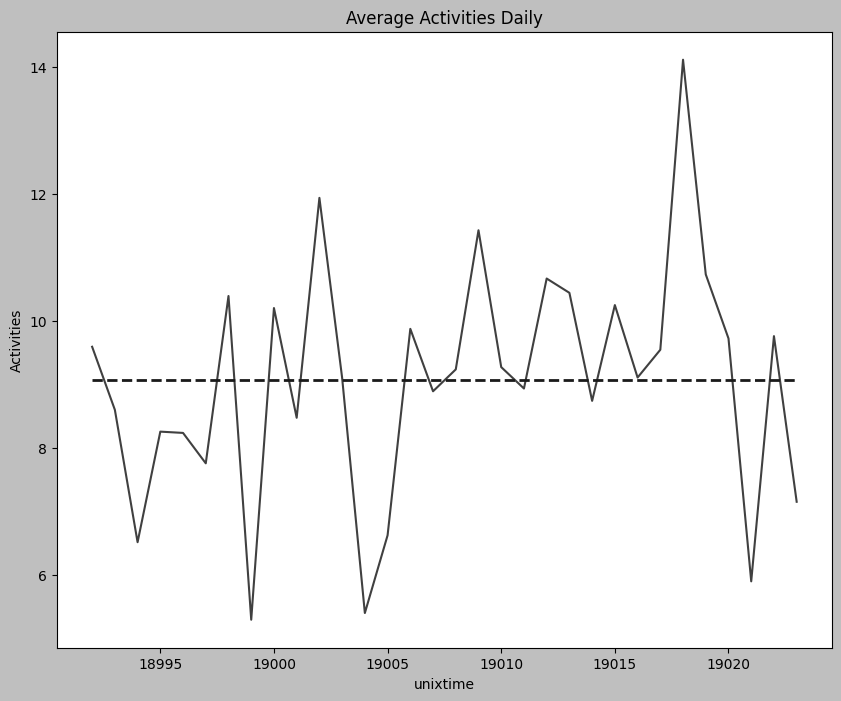

In [ ]:
from matplotlib.ticker import MaxNLocator


x_ticks = list(grouped.groups.keys())
plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("unixtime")
plt.ylabel("Activities")

plt.show()


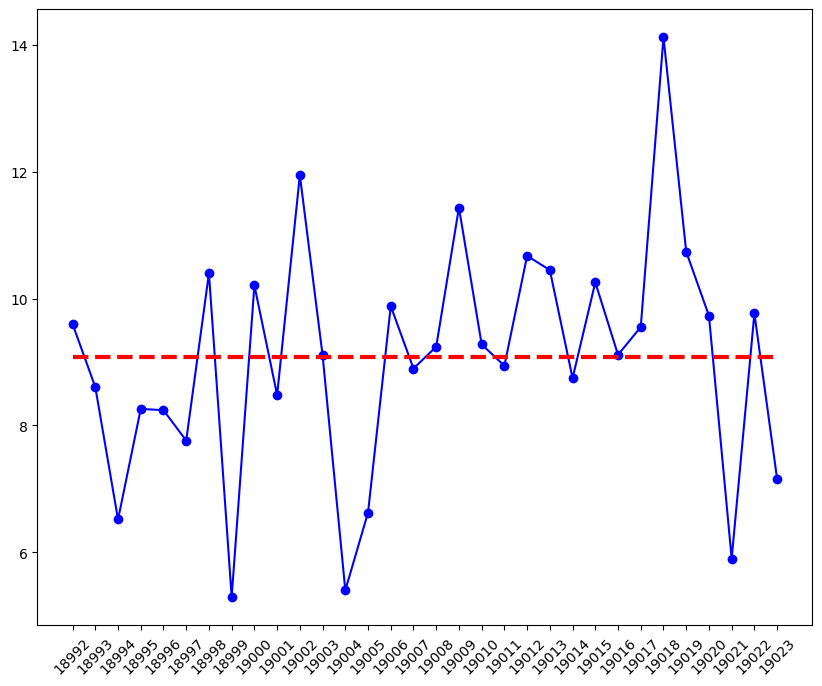

In [ ]:



x_ticks = list(grouped.groups.keys())
#bx = result.plot(xticks=x_ticks, y="mean")
plt.plot(x_ticks, result['mean'], 'bo-')
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='red', linestyle='--', linewidth=3)


#import matplotlib.pyplot as plt
#bx.fill_between(x_ticks, result['min'], result['max'], color='gray', alpha=0.2)



#import matplotlib.ticker as ticker
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.xticks(x_ticks, rotation=45)
plt.show()

In [ ]:
# 시간별 활동지수
# 3600 = 60 sec x 60 min
def make_hour_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 3600)
    
hour = cleaned.copy()
hour['utime'] =cleaned[["timestamp"]].apply(make_hour_unixtime, axis=1)
hour.head(5)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,455823,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,455823,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,455823,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,455823,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,455823,2734938,0.980475


In [ ]:
# unixtime으로 그룹핑하기
grouped = hour.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)

,mean,min,max
utime,,,
455823,3.025915,0.011198,14.338601
455824,3.948859,0.013024,7.813303
455825,1.965045,0.006504,9.646105
455826,9.173303,0.065512,67.447458
455827,6.503876,0.000000,28.781980


In [ ]:
#인덱스  utime을 열로 변환
result = result.reset_index()
result.head(5)

,utime,mean,min,max
0,455823,3.025915,0.011198,14.338601
1,455824,3.948859,0.013024,7.813303
2,455825,1.965045,0.006504,9.646105
3,455826,9.173303,0.065512,67.447458
4,455827,6.503876,0.000000,28.781980


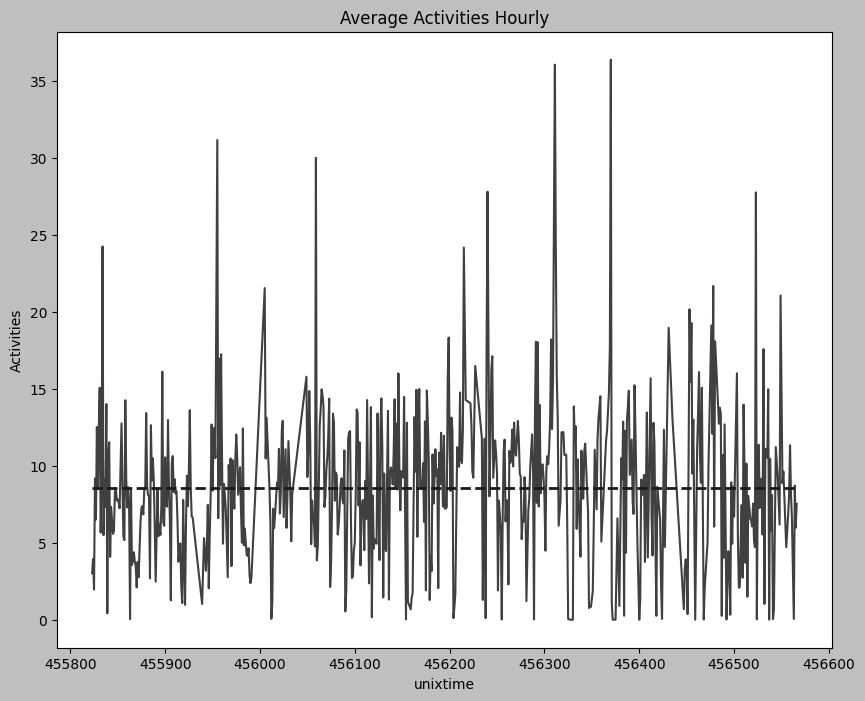

In [ ]:
from matplotlib.ticker import MaxNLocator


# x_ticks = list(grouped.groups.keys())
# bx = result.plot(xticks=x_ticks, y="mean")

# plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='red', linestyle='--', linewidth=3)


# plt.xticks(x_ticks, rotation=45)

# bx.xaxis.set_major_locator(MaxNLocator(30)) 

# x_ticks = list(grouped.groups.keys())
plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)


plt.title("Average Activities Hourly")
plt.xlabel("unixtime")
plt.ylabel("Activities")

# plt.legend()
plt.show()



In [ ]:
# 일별 활동지수
# 86400 = 60 sec x 60 min x 24 hour
def make_day_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 86400)
    
day = cleaned.copy()
day['utime'] =cleaned[["timestamp"]].apply(make_day_unixtime, axis=1)
day.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,utime,utime2,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,18992,2734938,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,18992,2734938,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,18992,2734938,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,18992,2734938,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,18992,2734938,0.980475


In [ ]:
# utime으로 그룹핑하기
grouped = day.groupby(['utime'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)


,mean,min,max
utime,,,
18992,9.598048,0.0,180.000000
18993,8.604871,0.0,196.279481
18994,6.518747,0.0,458.448986
18995,8.260939,0.0,206.975693
18996,8.240758,0.0,221.561886


In [ ]:
#인덱스 utime을 열로 변환
result = result.reset_index()
result.head(5)


,utime,mean,min,max
0,18992,9.598048,0.0,180.000000
1,18993,8.604871,0.0,196.279481
2,18994,6.518747,0.0,458.448986
3,18995,8.260939,0.0,206.975693
4,18996,8.240758,0.0,221.561886


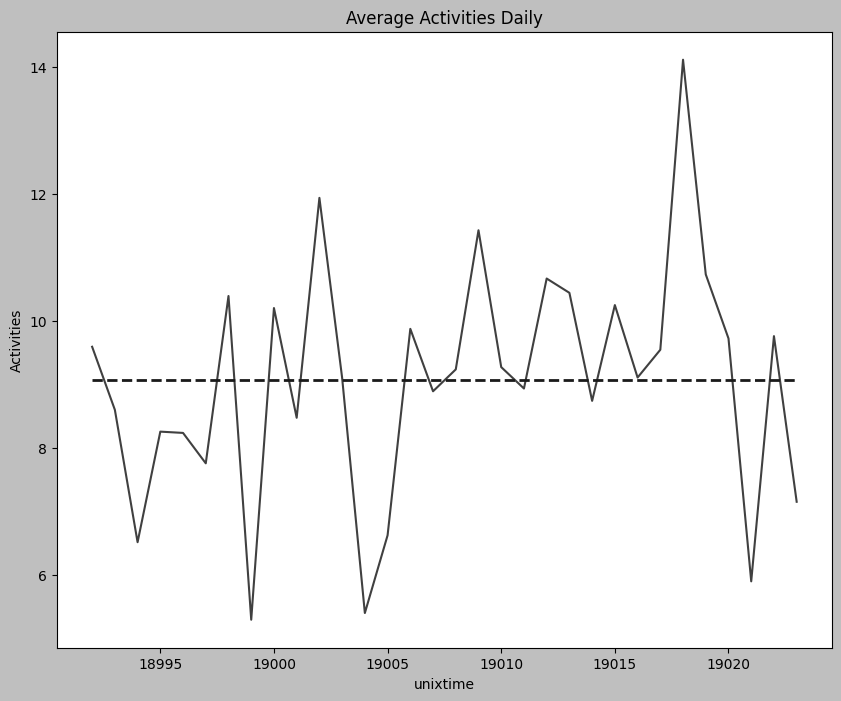

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.plot( result['utime'], result['mean'], c='0.25')

# 활동 평균 선
plt.hlines(result['mean'].mean(), result['utime'].min(), result['utime'].max(), color='0.1', linestyle='--', linewidth=2)

plt.title("Average Activities Daily")
plt.xlabel("unixtime")
plt.ylabel("Activities")

plt.show()


In [ ]:
newtenmin

NameError: name 'newtenmin' is not defined